<a href="https://colab.research.google.com/github/PALLAVI-web2002/predicting-coffee-sales-ml/blob/main/Coffee_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
data = pd.read_csv('/kaggle/index_1.csv')

# 1. First Look
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())
print("\nColumn Names and Data Types:")
print(data.info())
print("\nBasic Descriptive Statistics:")
print(data.describe(include='all')) # 'include='all'' gives stats for text columns too

# 2. Check for Missing Values Systematically
print("\nMissing Values per Column:")
missing_info = data.isnull().sum()
percent_missing = (data.isnull().sum() / len(data)) * 100
missing_table = pd.DataFrame({'Missing Count': missing_info, 'Percentage (%)': percent_missing.round(2)})
print(missing_table[missing_table['Missing Count'] > 0])

Dataset Shape: (3636, 6)

First 5 Rows:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3

 Handling Missing Values:

In [14]:
# For numerical columns (money): Investigate why they might be missing.
# If it's random, imputation is fine. Let's also check the skewness.
print("Skewness of money column:")
# Check if 'money' column exists before calculating skewness
if 'money' in data.columns:
    print(data['money'].skew())

    # If skewness is high (absolute value > 1), using the median is better than the mean.
    # Since 'money' has no missing values according to the first cell's output,
    # this fillna is not strictly necessary for this column based on current data,
    # but we'll keep the logic in case missing values appear later.
    data['money'].fillna(data['money'].median(), inplace=True)
else:
    print("'money' column not found.")


# For categorical columns (card): Check the distribution before imputing.
print("\nCard Value Counts:\n", data['card'].value_counts())

# If a value is missing, imputing with the mode is logical.
# Check if 'card' column exists before filling missing values
if 'card' in data.columns:
    data['card'].fillna(data['card'].mode()[0], inplace=True)
    print("\nMissing values in 'card' column after imputation:")
    print(data['card'].isnull().sum())
else:
    print("'card' column not found.")

Skewness of money column:
-0.523253548313041

Card Value Counts:
 card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
                      ... 
ANON-0000-0000-0015      1
ANON-0000-0000-0014      1
ANON-0000-0000-0013      1
ANON-0000-0000-0011      1
ANON-0000-0000-0010      1
Name: count, Length: 1316, dtype: int64

Missing values in 'card' column after imputation:
0


/tmp/ipython-input-118901479.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['money'].fillna(data['money'].median(), inplace=True)
/tmp/ipython-input-118901479.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

 Handling Outliers:

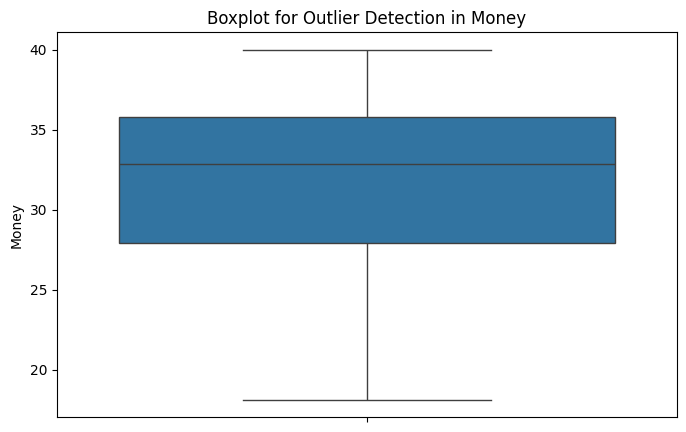

Dataset shape after removing outliers in 'money': (3636, 6)


In [16]:
# Create a boxplot to visualize outliers in the 'money' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='money')
plt.title('Boxplot for Outlier Detection in Money')
plt.ylabel('Money')
plt.show()

# Use Z-score to identify and remove outliers (|Z| > 3 is a common threshold)
from scipy.stats import zscore

# Calculate Z-scores only for the 'money' column
if 'money' in data.columns:
    z_scores = zscore(data['money'])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = abs_z_scores < 3
    data = data[filtered_entries]
    print(f"Dataset shape after removing outliers in 'money': {data.shape}")
else:
    print("'money' column not found for outlier removal.")

 Feature Engineering

In [18]:
# Convert Date to datetime and create powerful temporal features
data['date'] = pd.to_datetime(data['date'])
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['DayOfWeek'] = data['date'].dt.dayofweek # Monday=0, Sunday=6
data['DayName'] = data['date'].dt.day_name()
data['Weekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0) # Is it a weekend?
data['Quarter'] = data['date'].dt.quarter

print(data[['date', 'Year', 'Month', 'DayOfWeek', 'Weekend']].head())

        date  Year  Month  DayOfWeek  Weekend
0 2024-03-01  2024      3          4        0
1 2024-03-01  2024      3          4        0
2 2024-03-01  2024      3          4        0
3 2024-03-01  2024      3          4        0
4 2024-03-01  2024      3          4        0


Comprehensive Exploratory Data Analysis (EDA)

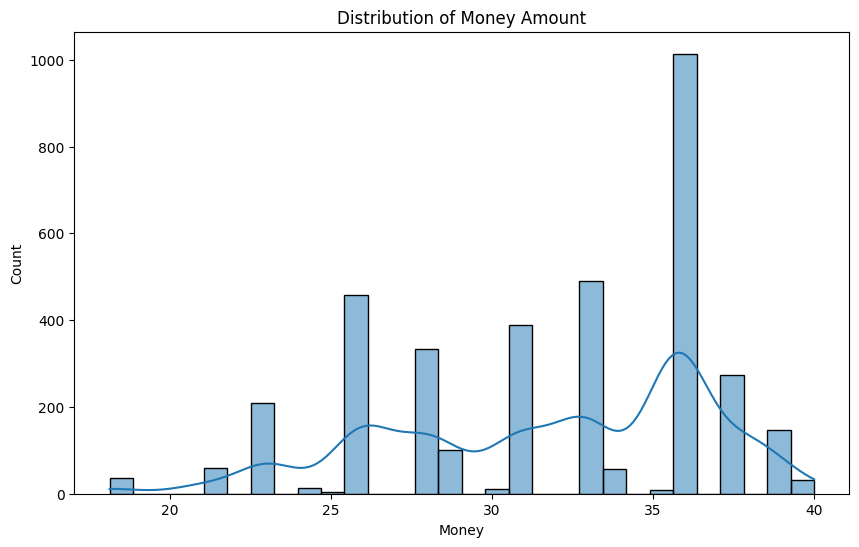

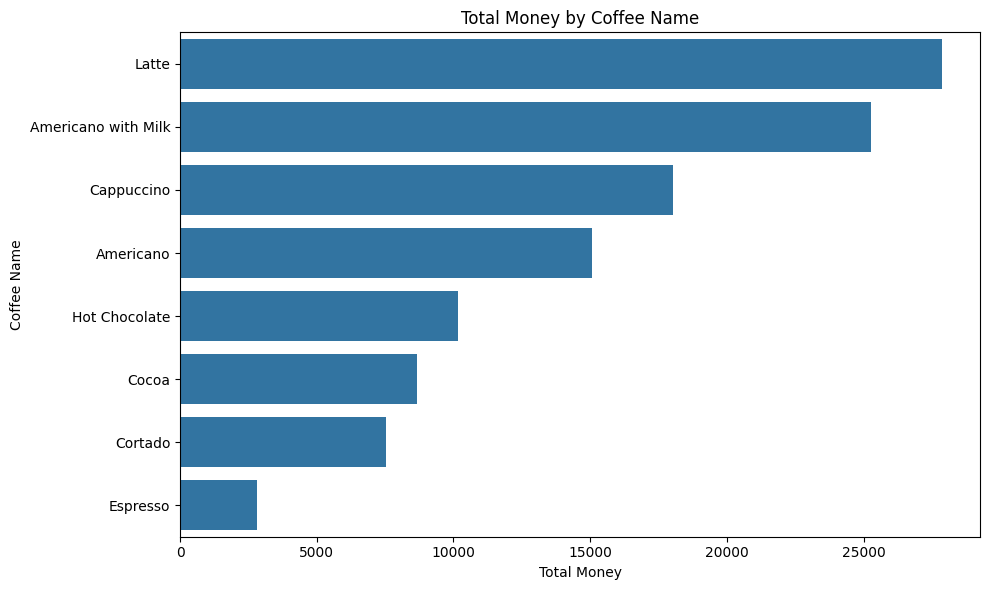

In [20]:
# Distribution of 'money'
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], bins=30, kde=True)
plt.title('Distribution of Money Amount')
plt.xlabel('Money')
plt.show()

# Total Money by 'coffee_name'
plt.figure(figsize=(10, 6))
coffee_money = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sns.barplot(x=coffee_money.values, y=coffee_money.index)
plt.title('Total Money by Coffee Name')
plt.xlabel('Total Money')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()

Bivariate/Multivariate Analysis (Understanding relationships)

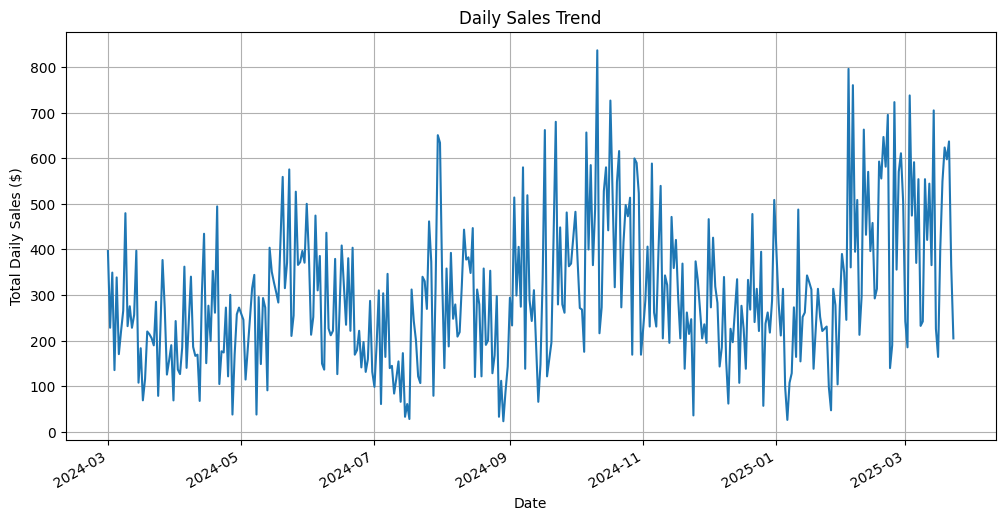

/tmp/ipython-input-2224786378.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Month', y='money', hue='Year', estimator='sum', ci=None)


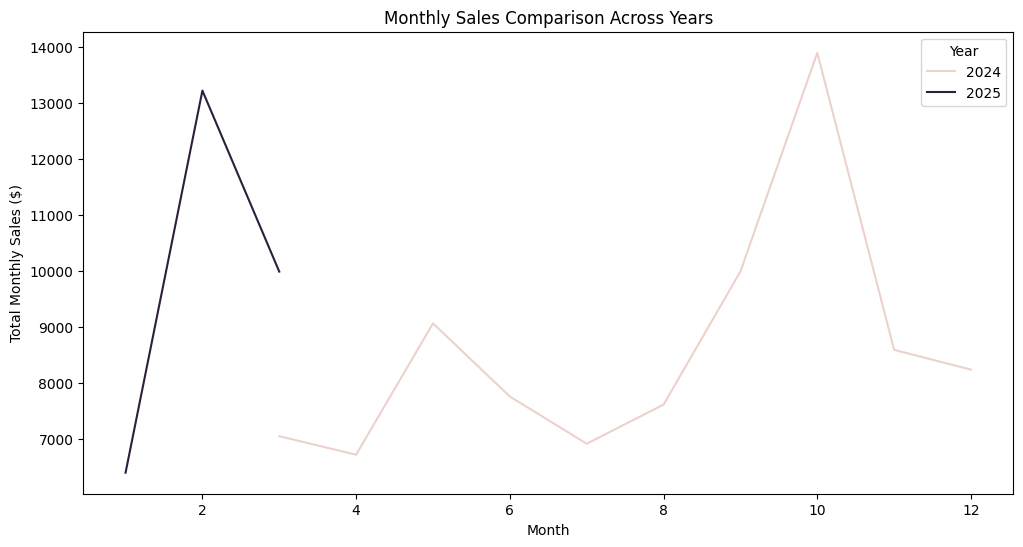

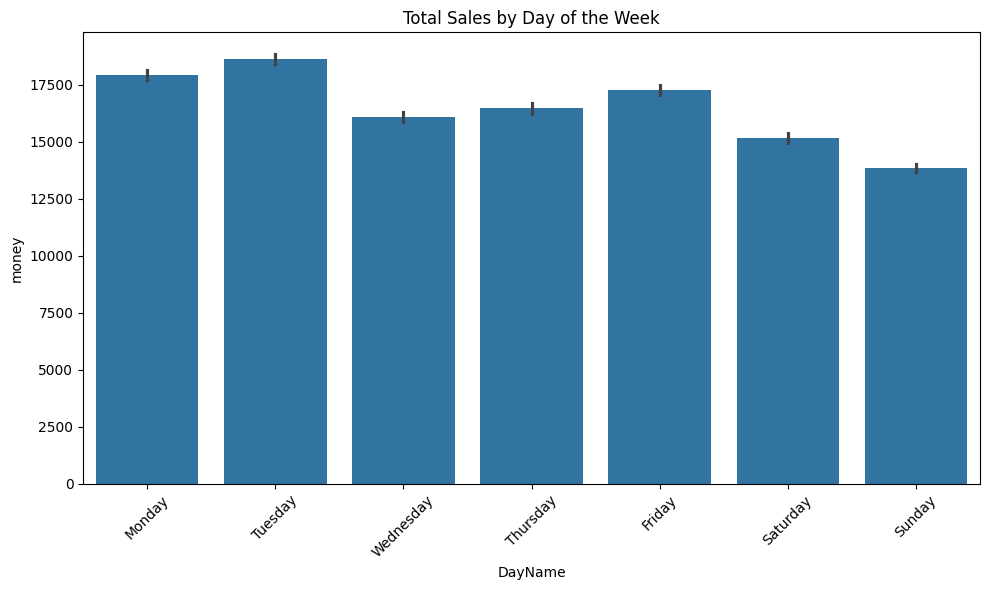

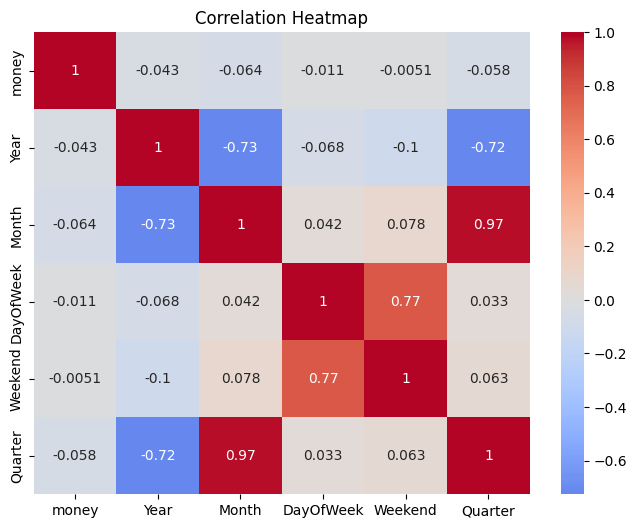

In [23]:
# Sales Trend Over Time (a key insight!)
plt.figure(figsize=(12, 6))
time_trend = data.groupby('date')['money'].sum()
time_trend.plot()
plt.title('Daily Sales Trend')
plt.ylabel('Total Daily Sales ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Monthly Sales by Year (to see seasonality)
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Month', y='money', hue='Year', estimator='sum', ci=None)
plt.title('Monthly Sales Comparison Across Years')
plt.ylabel('Total Monthly Sales ($)')
plt.legend(title='Year')
plt.show()

# Sales by Day of the Week
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=data, x='DayName', y='money', estimator=np.sum, order=day_order)
plt.title('Total Sales by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap (for numerical features)
plt.figure(figsize=(8, 6))
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Advanced Machine Learning Modeling

A. Preprocessing for ML:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = data.drop(columns=['money', 'date', 'datetime', 'DayName']) # Drop target and unusable columns
y = data['money']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Create a column transformer for preprocessing
# One-Hot Encode categorical variables, Scale numerical variables.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training and Evaluation:

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    # Create a pipeline: preprocessor -> model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    # Train the model
    pipeline.fit(X_train, y_train)
    # Make predictions
    y_pred = pipeline.predict(X_test)
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"\n{name} Results:")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

# Compare results
results_df = pd.DataFrame(results).T
print(results_df)


Linear Regression Results:
MAE: $0.90
RMSE: $1.32
R² Score: 0.9288

Ridge Regression Results:
MAE: $1.00
RMSE: $1.34
R² Score: 0.9272

Random Forest Results:
MAE: $0.10
RMSE: $0.52
R² Score: 0.9889
                        MAE       MSE      RMSE        R2
Linear Regression  0.901917  1.746570  1.321579  0.928809
Ridge Regression   0.999798  1.786935  1.336763  0.927163
Random Forest      0.099542  0.271626  0.521177  0.988928


C. Model Interpretation:

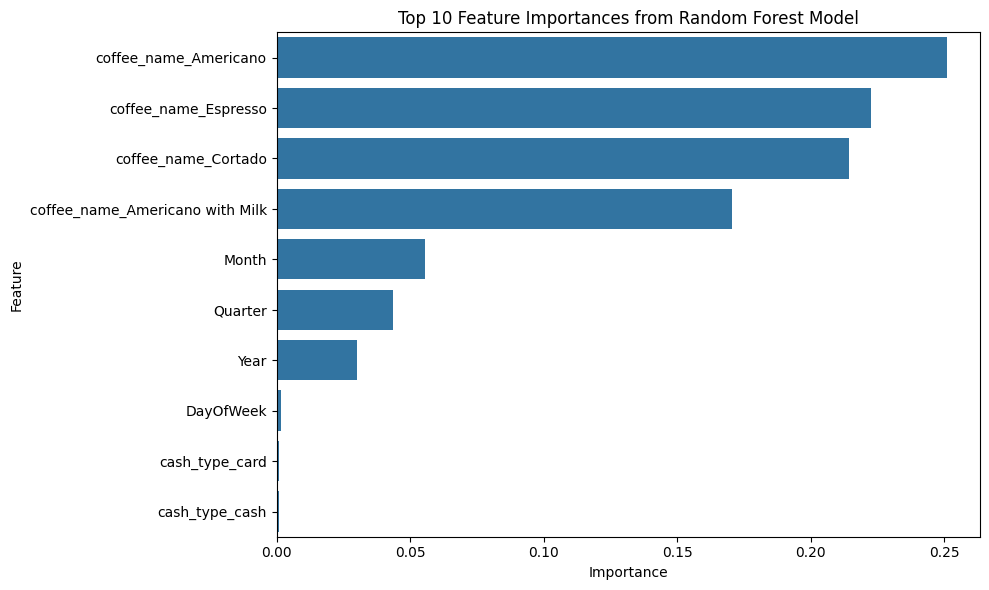

In [27]:
# Let's interpret the best model, e.g., Random Forest
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
best_model.fit(X_train, y_train)

# Get feature importances
# Extract feature names after one-hot encoding
feature_names = (numerical_cols.tolist() +
                 list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)))
importances = best_model.named_steps['model'].feature_importances_

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False).head(10) # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.tight_layout()
plt.show()